**Giang Pham**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 3b: Polynomial Regression

In [2]:
import os
import random
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': (10,6)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_86544/947926173.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_86544/947926173.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


## Task 1: Import  datasets

1. Import training ('data/lab3b-400-training.csv') and testing ('data/lab3b-100-testing.csv') datasets into separate matrices using [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html).
2. The column x is the independent variable.  Columns y1, y2, and y3 are dependent variables.  We will only be using y1.
3. Print the first 5 rows of each dataset.
4. Plot your dataset, column x and y1, with a title and axis labeled. 

Training dataset [A] first 5 rows: 
 [[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows: 
 [[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]

--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-

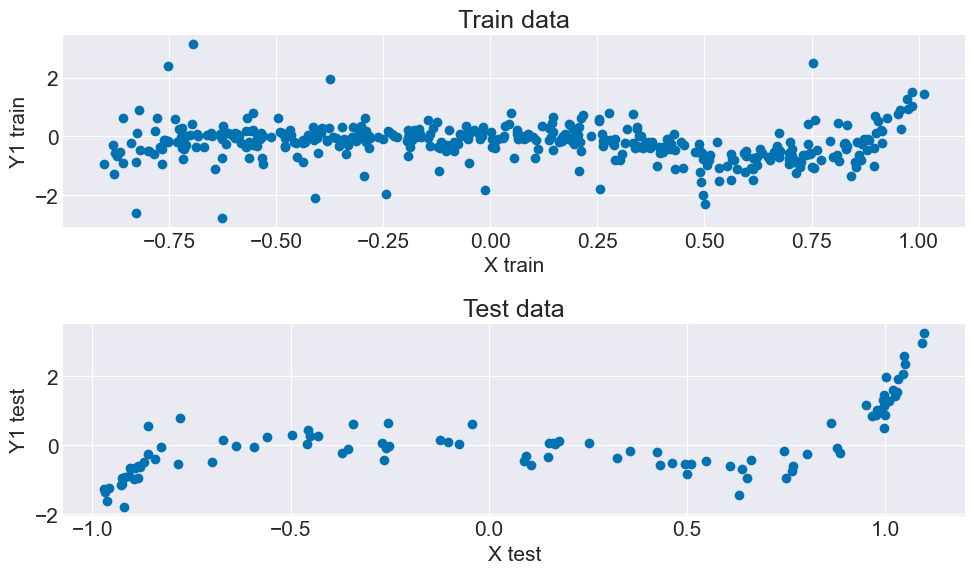

In [44]:
A = np.genfromtxt("data/lab3b-400-training.csv", delimiter=",", skip_header=2)
AT = np.genfromtxt("data/lab3b-100-testing.csv", delimiter=",", skip_header=2)

print("Training dataset [A] first 5 rows: \n", A[:5,:])
print("Testing dataset [AT] first 5 rows: \n", AT[:5,:])

fig, ax = plt.subplots(2,1)
ax[0].scatter(A[:,0], A[:,1] )
ax[0].set_xlabel("X train")
ax[0].set_ylabel("Y1 train")
ax[0].set_title("Train data")

ax[1].scatter(AT[:,0], AT[:,1] )
ax[1].set_xlabel("X test")
ax[1].set_ylabel("Y1 test")
ax[1].set_title("Test data")

fig.tight_layout()

print('''
--------------------------------------
Your results should look like
--------------------------------------
Training dataset [A] first 5 rows:
[[ 0.86084 -0.62216  3.93574 11.60028]
 [-0.30754  0.00447  4.675    8.86444]
 [ 0.77201 -0.79127  3.94762 10.83111]
 [-0.71808 -0.75327 11.83894  5.23568]
 [-0.28735  0.01856  8.7937   8.49431]]
Testing dataset [AT] first 5 rows:
[[-0.91878 -0.9357  22.11518  4.98345]
 [-0.92811 -1.16687 18.58222  3.34313]
 [-0.96837 -1.36751 13.3575   3.65102]
 [-0.96436 -1.62782 13.88831  4.08888]
 [-0.97014 -1.2789  24.96344  3.74772]]
''')

## Task 2. 3 dimensional polynomial regression

### 2a. Make 3 polynomial matrices

$$
\left(\begin{array}{cccc} 
1 & x_0^1 & x_0^2 & x_0^3\\
1 & x_1^1 & x_1^2 & x_1^3\\
1 & x_2^1 & x_2^2 & x_2^3\\
1 & x_3^1 & x_3^2 & x_3^3\\
1 & x_4^1 & x_4^2 & x_4^3\\
... & ... & ... & ...\\
1 & x_n^1 & x_n^2 & x_n^3\\
\end{array}\right)
$$ 

1. Make a polynomial matrix for the training dataset using the independent variable
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `Ap`, with the same number of rows as the training dataset and 4 columns
    5. Update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
2. Make a polynomial matrix for the test dataset
    3. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `ATp`, with the same number of rows as the test dataset and 4 columns
    5. Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix
1. Make a polynomial matrix to graph the prediction line
    1. For graphing create a [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html), `line_x`, from the range of the test dataset's x column with 100 steps
    2. Create a matrix of [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), `lineM_x`, with the same number of rows as the length of `line_x` and 4 columns
    5. Like in the step above, update the second column to be the respective x column, the third column to be the respective x column squared, and the fourth column to be the respective x column cubed.
    1. Print the first 5 rows of the matrix

In [4]:
Ap = np.ones(shape = (A.shape[0],4))
for i in range(Ap.shape[1]):
    Ap[:,i] = np.power(A[:,0],i)

ApT = np.ones(shape = (AT.shape[0],4))
for i in range(AT.shape[1]):
    ApT[:,i] = np.power(AT[:,0],i)

line_x = np.linspace(np.min(AT[:,0]), np.max(AT[:,0]), 100) 
lineM_x = np.ones(shape = (len(line_x), 4))
for i in range(lineM_x.shape[1]): #0,1,2,3
    lineM_x[:,i] = np.power(line_x,i) 

print("Ap first 5 rows: \n", Ap[:5,:])
print("ATp first 5 rows: \n", ApT[:5,:])
print("lineM_x first 5 rows: \n", lineM_x[:5,:])


print('''
--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows
[[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]
''')

Ap first 5 rows: 
 [[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows: 
 [[ 1.      -0.91878  0.84417 -0.77561]
 [ 1.      -0.92811  0.86139 -0.79946]
 [ 1.      -0.96837  0.93773 -0.90807]
 [ 1.      -0.96436  0.92999 -0.89685]
 [ 1.      -0.97014  0.94118 -0.91308]]
lineM_x first 5 rows: 
 [[ 1.      -0.97014  0.94118 -0.91308]
 [ 1.      -0.94925  0.90107 -0.85534]
 [ 1.      -0.92835  0.86183 -0.80008]
 [ 1.      -0.90745  0.82347 -0.74726]
 [ 1.      -0.88656  0.78598 -0.69682]]

--------------------------------------
Your results should look like
--------------------------------------
Ap first 5 rows
[[ 1.       0.86084  0.74104  0.63792]
 [ 1.      -0.30754  0.09458 -0.02909]
 [ 1.       0.77201  0.596    0.46012]
 [ 1.      -0.71808  0.51564 -0.37027]
 [ 1.      -0.28735  0.08257 -0.02373]]
ATp first 5 rows
[[ 1.      

### 2b. Calculate 3 dimensional polynomial regression
1.  Use [linalg.lstsq]() from scipy to calculate and print the weights, residuals and rank for the dependent variable `y1`. 
2.  Calculate and print the $R^2$ value.
    

In [18]:
c, residues, rank, _ = np.linalg.lstsq(Ap, A[:,1])
print("c: ", c, "\n")
print("residues: ", residues, "\n")
print("rank: ", rank, "\n")

#calculate r2 
y_mean = np.sum(A[:,1])/A[:,0].shape[0]
smd = np.sum(np.square(A[:,1]-y_mean))
r2 = 1- residues/smd
print("r2: ", r2)


print()

print('''
--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211
''')

c:  [-0.15511 -0.96979 -0.24675  1.61541] 

residues:  [136.56714] 

rank:  4 

r2:  [0.11596]


--------------------------------------
Your results should look like
--------------------------------------
c: [-0.15511 -0.96979 -0.24675  1.61541]
residuals: 136.56714157926723
rank: 4
r-squared: 0.11595609001119211



/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_86544/235575822.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c, residues, rank, _ = np.linalg.lstsq(Ap, A[:,1])


### 2c. Testing and prediction

1. calculate the $R^2$ for the linear regressions ability predict the test dataset
    1.  Multiply `ATp` with the weights to get the predicted values
    2.  Calculate the $R^2$ value and print it the dependent variable `y1`.
    > $R^2 = 1 - \frac{\sum_i \left (y_i - \hat{y}_i \right )^2}{\sum_i \left (y_i - \bar{y} \right )^2}$ <br> <br> $y_i$ are the dependent variable values from the test dataset <br> $\bar{y}_i$ is the mean of the dependent variable values from the test dataset <br> $\hat{y}_i$ is the y values *predicted* by the regression

2. Print the $R^2$ for the test dataset

In [21]:
y1_test = AT[:,1] 
y1_test_mean = np.mean(y1_test)

y1_test_pred = ApT @ c 
denom = np.sum(np.square(y1_test - y1_test_mean))
numerator = np.sum(np.square(y1_test - y1_test_pred))
r2_test = 1 - (numerator/denom)
print("r2 test", r2_test)

print('''
--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438
''')

r2 test 0.4431027176546437

--------------------------------------
Your results should look like
--------------------------------------
r2 test: 0.4431027176546438



### Task 3) Visualize the Results
In one plot:
1. Graph the training data as a scatter plot.
1. Graph the test dataset as a scatter plot.
1. Graph the prediction line
    1. the independent variable is line_x
    2. the dependent variable is lineM_x multiplied with the weights for the independent variable.
1. Include a title (with the two $R^2$ values), axis labels, and a legend

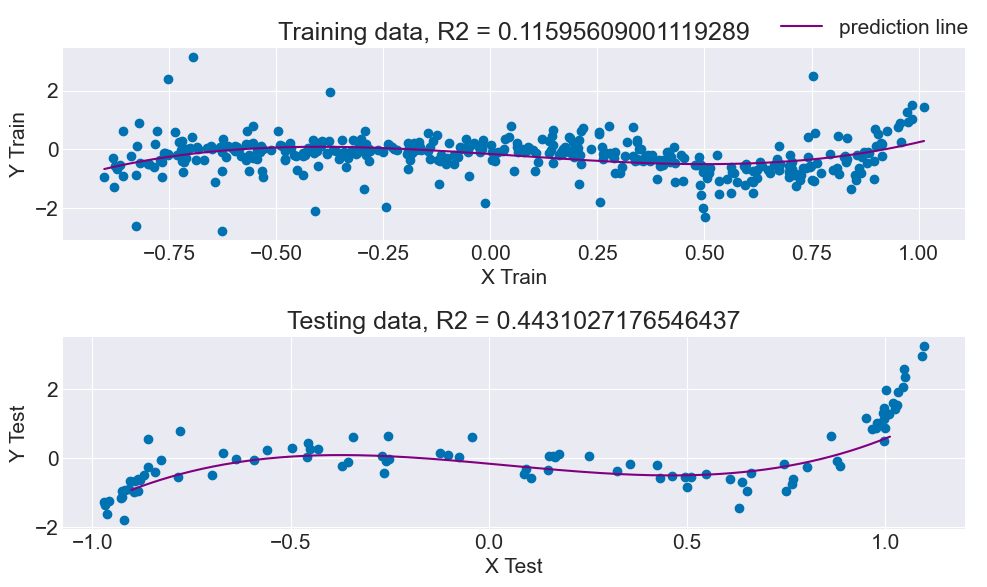

In [40]:
fig,ax = plt.subplots(2,1)
train_x_data = A[:,0]
train_y1_data = A[:,1]

test_x_data = AT[:,0]
test_y1_data = AT[:,1]
#TRAIN DATA
ax[0].scatter(train_x_data, train_y1_data)
line_x = np.linspace(np.min(train_x_data), np.max(train_x_data), 1000)
lineM_x = c[0] + c[1]*line_x + c[2]*np.square(line_x) + c[3]*np.power(line_x, 3)
ax[0].plot(line_x, lineM_x, "purple", label = "prediction line")
ax[0].set_title("Training data, R2 = {}".format( r2[0]))
ax[0].set_xlabel("X Train")
ax[0].set_ylabel("Y Train")


#prediction line 
ax[1].scatter(test_x_data, test_y1_data)
line_x_t = np.linspace(np.min(test_x_data), np.max(test_x_data), 1000)
lineM_x_t = c[0] + c[1]*line_x_t + c[2]*np.square(line_x_t) + c[3]*np.power(line_x_t, 3)
ax[1].plot(line_x, lineM_x_t, "purple")
ax[1].set_title("Testing data, R2 = {}".format( r2_test))
ax[1].set_xlabel("X Test")
ax[1].set_ylabel("Y Test")

fig.legend()
fig.tight_layout()

